## MEDIDAS DE RENTABILIDAD

### A) Tipos de inversiones financieras

+ **Gestión de carteras**: análisis títulos, análisis carteras y selección de las carteras óptimas (min. reisgo y max. rentabilidad)

+ **Administración de inversiones**: establecer polítca de inversión (sujeta al perfil de riesgo del cliente), análisis títulos, formalización y análisis de las carteras, selección de la cartera y evaluación periódica de sus resultados.


### B) Medidas de rentabilidad

- **Rentabilidad simple**: 
    - Mide el cambio de valor de un activo sin reinversión.
    - Cálculo: $C_n=C_0·(1+n·r)$; $r=((C_n/C_0)-1)/n$


- **Rentabilidad compuesta** 
    - Mide el cambio de valor de un activo cuando sus rendimientos son reinvertidos. Utilizado para evaluación de carteras
    - Cálculo: $C_n=C_0·(1+i)^n$; $i=(C_n/C_0)^1/n -1$

- **Rentabilidad continua**
    - Mide el cambio de valor de un activo cuando su reinversión es infinitamente frecuente. Utilizado para evaluar dereivados.
    - Cálculo: $C_n=C_0·e^nk$; $k=ln(C_n/C_0)/n$

### **Ejercicio 1.1.**

| 0 | tr1. | 
| ---- | ---- |
| -42 | 42+1.5 |

Dado dicho horizonte temporal, calcular:
- Rentabilidad mensual, trimestral y anual, simple, compuesta y continua y comparar su igualdad temporal

In [11]:
# Rentabilidad simple
rm=((43.5/42)-1)/3
print("Rentabilidad mensual lineal:", round(rm*100,4), "%")
rt=(43.5/42)-1
print("Rentabilidad trimestral lineal:", round(rt*100,4), "%")
ra=((43.5/42)-1)*4
print("Rentabilidad anual lineal:", round(ra*100,4), "%")
print("Igualdad de las rentabilidades: (1+rm)*3=(1+rt)=(1+ra)/4")

Rentabilidad mensual lineal: 1.1905 %
Rentabilidad trimestral lineal: 3.5714 %
Rentabilidad anual lineal: 14.2857 %
Igualdad de las rentabilidades: (1+rm)*3=(1+rt)=(1+ra)/4


In [12]:
# Rentabilidad compuesta
im=((43.5/42)**(1/3))-1
print("Rentabilidad mensual compuesta:", round(im*100,4), "%")
it=(43.5/42)-1
print("Rentabilidad trimestral compuesta:", round(it*100,4), "%")
ia=((43.5/42)**(4))-1
print("Rentabilidad anual compuesta:", round(ia*100,4), "%")
print("Igualdad de las rentabilidades: (1+im)^3=(1+it)=(1+ia)^1/4")

Rentabilidad mensual compuesta: 1.1766 %
Rentabilidad trimestral compuesta: 3.5714 %
Rentabilidad anual compuesta: 15.0694 %
Igualdad de las rentabilidades: (1+im)^3=(1+it)=(1+ia)^1/4


In [13]:
import numpy as np
# Rentabilidad continua
km=np.log(43.5/42)/3
print("Rentabilidad mensual continua:", round(km*100,4), "%")
kt=np.log(43.5/42)
print("Rentabilidad trimestral compuesta:", round(kt*100,4), "%")
ka=np.log(43.5/42)*4
print("Rentabilidad anual compuesta:", round(ka*100,4), "%")
print("Igualdad de las rentabilidades: km*3=kt=ka/4")

Rentabilidad mensual continua: 1.1697 %
Rentabilidad trimestral compuesta: 3.5091 %
Rentabilidad anual compuesta: 14.0365 %
Igualdad de las rentabilidades: km*3=kt=ka/4


### **Ejercicio 1.2.**

| 0 | m1 | m2 | m3 | m4 | m5 | m6 | m7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| -120 | 121.20 | 123 | 125 | 124 | 125.62 | 127.32 | 128 |


Dado dicho horizonte temporal, calcular:

- La rentabilidad de cada mes y rentabilidad media mensual (simple y continua).

- La rentabilidad mensual.

- La rentabilidad anual.

- Comparar las distintas medidas de la rentabilidad.

In [14]:
#Rentabilidad por cada mes y media mensual
import pandas as pd
import numpy as np

precio=pd.DataFrame({"Mes": [0,1,2,3,4,5,6,7],
    "Cotización": [120,121.20,123,125,124,125.62,127.32,128]})
precio.set_index("Mes", inplace=True)
precio["R simple"]=precio["Cotización"].pct_change()*100
precio["R instantánea"]=np.log(precio["Cotización"]/precio["Cotización"].shift())*100
#Con .shift(1) seleccionamos la fila anterior a la actual

print("Cuadro resumen de las rentabilidades: ")
print("--------------------------------------")
print(precio)
print("--·------------------------------------")
print("Rentabilidad simple media:", round(precio["R simple"].mean(),5),"%")
print("--------------------------------------")
print("Rentabilidad instantánea media:", round(precio["R instantánea"].mean(),5),"%")


Cuadro resumen de las rentabilidades: 
--------------------------------------
     Cotización  R simple  R instantánea
Mes                                     
0        120.00       NaN            NaN
1        121.20  1.000000       0.995033
2        123.00  1.485149       1.474228
3        125.00  1.626016       1.612938
4        124.00 -0.800000      -0.803217
5        125.62  1.306452       1.297991
6        127.32  1.353288       1.344213
7        128.00  0.534087       0.532666
--·------------------------------------
Rentabilidad simple media: 0.92928 %
--------------------------------------
Rentabilidad instantánea media: 0.92198 %


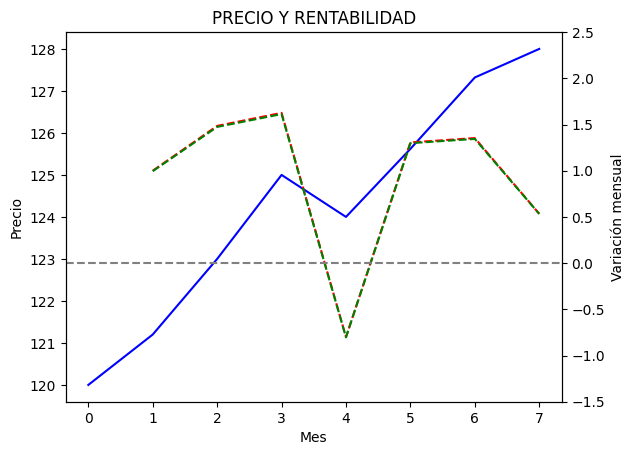

In [15]:
#Rentabilidad por cada mes y media mensual gráficamente
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

#Primer eje: precio
ax1.plot(precio["Cotización"], color="blue", label="Precio")
ax1.set_xlabel('Mes')
ax1.set_ylabel('Precio')

#Segundo eje: rentabilidad
ax2=ax1.twinx()
ax2.plot(precio["R simple"], color="red", linestyle='--', label="Rentabilidad Simple")
ax2.plot(precio["R instantánea"], color="green", linestyle='--', label="Rentabilidad Simple")
ax2.set_ylabel("Variación mensual")
ax2.set_ylim(-1.5, 2.5) #Establecemos mínimo y máximo del eje
ax2.axhline(0, color='gray', linestyle='--') # Añadimos línea en eje 0

plt.title("PRECIO Y RENTABILIDAD")
plt.show()

In [16]:
import numpy as np

#Rentabilidad mensual: desde primer mes hasta el último
## Simple: 128= 120·(1+7*rm)
rm=((precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0])-1)/7
print("Rentabilidad mensual simple:", round(rm*100,5), "%")

## Compuesta: 128=120·(1+im)^7
im=(precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0])**(1/7)-1
print("Rentabilidad mensual compuesta:", round(im*100,5), "%")

## Instantánea: 128=120·e^7km
km=np.log((precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0]))/7
print("Rentabilidad mensual instantánea:", round(km*100,5), "%")

Rentabilidad mensual simple: 0.95238 %
Rentabilidad mensual compuesta: 0.92624 %
Rentabilidad mensual instantánea: 0.92198 %


In [17]:
#Rentabilidad anual: desde primer mes hasta el último
## Simple: 128= 120·(1+(7/12)*rm)
ra=((precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0])-1)*(12/7)
print("Rentabilidad anual simple:", round(ra*100,5), "%")

## Compuesta: 128=120·(1+im)^(7/12)
ia=(precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0])**(12/7)-1
print("Rentabilidad anual compuesta:", round(ia*100,5), "%")


## Instantánea: 128=120·e^7/12km
ka=np.log((precio["Cotización"].iloc[7]/precio["Cotización"].iloc[0]))*(12/7)
print("Rentabilidad mensual instantánea:", round(ka*100,5), "%")

Rentabilidad anual simple: 11.42857 %
Rentabilidad anual compuesta: 11.69899 %
Rentabilidad mensual instantánea: 11.06375 %


In [18]:
precio

,Cotización,R simple,R instantánea
Mes,,,
0,120.00,NaN,NaN
1,121.20,1.000000,0.995033
2,123.00,1.485149,1.474228
3,125.00,1.626016,1.612938
4,124.00,-0.800000,-0.803217
5,125.62,1.306452,1.297991
6,127.32,1.353288,1.344213
7,128.00,0.534087,0.532666


Comparando las rentabilidades observamos que:
- Rentabilidad simple: $12·r_m=r_a$; $r_m!= mean(Precio["R simple"])$
    Por lo que podemos afirmar que esta rentabilidad media mensual es diferente a la rentabilidad mensual simple. 

- Rentabilidad compuesta: $(1+i_m)^12=i_a$; visto en el ejercicio anterior

- Rentabilidad instantánea: $12·k_m=k_a$; $k_m=mean(Precio["R instantánea"])$
   Por lo que podemos afirmar que esta rentabilidad media mensual es igual a la rentabilidad mensual continua. 

### **Ejercicio 1.3.**

De las rentabilidades diarias:
- Rentabilidad diaria media simple y logarítmica.
- Rentabilidad anualizada media simple y logarítmica.
- Comparación con rentabilidad anual

Apartado a)
- Rentabilidad simple: $C_n=C_0*(1+r_d) ; r_d=\frac{C_n}{C_0}-1$

- Rentabilidad instantánea: $Cn=C_0·e^{k_d} ; k_d=ln(\frac{C_n}{C_0})$

In [29]:
# Apartado a)
import pandas as pd
import numpy as np

cot=pd.read_excel("https://raw.githubusercontent.com/jjimvar/Gestion-de-carteras/main/1.%20Conceptos%20B%C3%A1sicos/ejemplos_l1.xlsx", 
    sheet_name="Ejemplo 1.3")

cot["Rent. Simple"]=((cot["Cotización"]/cot["Cotización"].shift(1))-1)*100
cot["Rent. Instantánea"]=np.log(cot["Cotización"]/cot["Cotización"].shift(1))*100

#Apartado b)
print(f" Rentabilidad simple media anualizada: {round((cot["Rent. Simple"].mean())*252,5)} %") #Utilizamos 252 días para los años
print(f" Rentabilidad instantánea media anualizada: {round((cot["Rent. Instantánea"].mean())*252,5)} %") #Utilizamos 252 días para los años

print(f"La rentabilidad simple diaria media es de: {round(cot["Rent. Simple"].mean(),5)} %")
print(f"La rentabilidad simple diaria media es de: {round(cot["Rent. Instantánea"].mean(),5)} %")

 Rentabilidad simple media anualizada: 28.89112 %
 Rentabilidad instantánea media anualizada: 28.8045 %
La rentabilidad simple diaria media es de: 0.11465 %
La rentabilidad simple diaria media es de: 0.1143 %


En un cierto período s, en cualquier sesión:

$$r_s=\frac{C_s}{C_{s-1}} -1$$

$$k_s= \ln(\frac{C_s}{C_{s-1}})=\ln(C_s)-\ln(C_{s-1})$$

De esta forma, la rentabilidad media simple y la media instantánea se definen como:

$$\bar{r}= \frac{\sum_{s=1}^{t} r_s} {T}$$

$$\bar{k}= \frac{\sum_{s=1}^{t} k_s} {T}$$

Para la rentabilidad media instantánea tenemos:

$$\bar{k}= \frac{(\ln(C_1)-\ln(C_0))+(\ln(C_2)-\ln(C_1))+...+(\ln(C_T)-\ln(C_T-1))} {T} = \frac{\ln(C_T)-\ln{C_0}}{T}=\frac{1} {T} · \ln(\frac{C_T}{C_0})$$

De donde podemos extraer que:

$$\bar{k}=\frac{\sum_{s=1}^{T} k_s} {T}=\frac{1} {T} · \ln(\frac{C_T}{C_0});$$
$$T·\bar{k}=\sum_{s=1}^{T} k_s=\ln(\frac{C_T}{C_0});$$
$$e^{T·\bar{k}}=e^{\sum_{s=1}^{T} k_s}=\frac{C_T}{C_0}$$
$$C_T=C_0·e^{T·\bar{k}}=C_0·e^{\sum_{s=1}^{T} k_s}$$

Observamos que la rentabilidad intantánea, $\ln(\frac{C_T}{C_0})$, es igual a la suma de rentabilidades de los subperíodos (**condición de aditividad**):

$$\ln(\frac{C_T}{C_0})=k_1+k_2+...+k_t$$

Si tenemos sesiones diarias, las rentabilidades se definen como:

$$\bar{r_a}=252·\bar{r}; \bar{k_a}=252·\bar{k}$$

Rentabilidad anual simple:

$$C_T=C_0·(1+\frac{T} {252}·r_a); r_a \neq \bar{r_a}$$

Rentabilidad anual continua:

$$C_T=C_0·e^{\frac{T}{252}·k_a}; i_a \neq \bar{i_a}$$

De donde se deduce: $k_a= \frac{252} {T}·\ln{\frac{C_T}{C_0}}$. Pero $\bar{k}=\frac{1} {T} ·\ln{\frac{C_T}{C_0}}$. Por tanto:

$$k_a=252·\bar{k}=\bar{k_a}$$

**Se aprecia como la rentabilidad continua anual representa la media de cualquier subperíodo (por su igualdad a nivel de tiempo) y, además, la media anual de rentabilidades.**

Rentabilidad anual compuesta:

$$C_T=C_0·(1+i_s)^{\frac{T}{252}}$$

Comparando con la rentabilidad anual continua:

$$(1+i_s)^{\frac{T}{252}}=e^{\frac{T}{252}·k_a} ; k_a=\ln{(1+i_a)}$$

Sabiendo que $r_s=\frac{C_T}{C_0}-1=i_s$

$$(1+i_1)(1+i_2)···(1+i_T)=\prod_{s=1}^{T} (1+i_s)=\frac{C_T} {C_0}=(1+\bar{i})^T$$

$$\bar{i}=\sqrt[T]{\prod_{s=1}^{T} (1+i_s)} -1$$

El valor $\bar{i}$ representa la rentabilidad media compuesta o geométrica:

$$C_T=C_0·(1+\bar{i})^T ; \bar{i}=\sqrt[T] {\frac{C_T}{C_0}} -1$$

Comparando con la rentabilidad anual compuesta:

$$(1+\bar{i})^{252}=1+i_a$$

Además, si comparamos la media anual:

$$(1+\bar{i})^{252}=1+i_a=1+\bar{i_a} ; i_a=\bar{i_a}$$

En conclusión, la rentabilidad anual es igual a:

- 252 x Rentabilidad media diaria
- 52 x Rentabilidad media semanal
- 12 x Rentabilidad media mensual

**RESUMEN DE IGUALDADES**

- Rentabilidad simple: $\bar{r_a}=252·\bar{r} \neq r_a$
- Rentabilidad continua: $\bar{k_a}=252·\bar{k} = k_a = \ln{(1+i_a)}$
- Rentabilidad compuesta: $(1+\bar{i_a})=(1+\bar{i})^{252}=(1+i_a)$

### **Ejercicio 1.4.**

Con el cuadro de cotizaciones, hallar:

- Rentabilidad media mensual
- Rentabilidad mensual
- Rentabilidad media mensual elevada al año
- Rentabilidad anual

In [ ]:
import pandas as pd
import numpy as np
import statistics as st

df=pd.read_excel("https://raw.githubusercontent.com/jjimvar/Gestion-de-carteras/main/1.%20Conceptos%20B%C3%A1sicos/ejemplos_l1.xlsx", 
    sheet_name="Ejemplo 1.4")

#Rentabilidad media mensual
df["R simple"]=df["Cotización"]/df["Cotización"].shift(1)-1
df["R instantánea"]=np.log(df["Cotización"]/df["Cotización"].shift(1))
rgeo=st.geometric_mean(1+df["R simple"].iloc[1:])-1

print(f"Rentabilidad media mensual simple: {round(df["R simple"].mean()*100, 4)} %")
print(f"Rentabilidad media mensual instantánea: {round(df["R instantánea"].mean()*100, 4)} %")
print(f"Rentabilidad media mensual geométrica: {round(rgeo*100, 4)} %")
print("-------------------------------------------")

Rentabilidad media mensual simple: 1.0051 %
Rentabilidad media mensual instantánea: 0.9666 %
Rentabilidad media mensual geométrica: 0.9712 %


Rentabilidad mensual:

- Simple: $C_7=C_0·(1+7·r_m); r_m= \frac{\frac{C_7}{C_0}-1}{7}$
- Instantánea: $C_7=C_0·e^{7·k_m};k_m=\frac{\ln{C_7/C_0}}{7}$
- Geométrica: $C_7=C_0·(1+i_m)^7;i_m=\sqrt[7]{\frac{C_7}{C_0}}-1$

In [76]:
import numpy as np

rm=((df["Cotización"].iloc[7]/df["Cotización"].iloc[0])-1)/7*100
km=np.log(df["Cotización"].iloc[7]/df["Cotización"].iloc[0])/7*100
im=((df["Cotización"].iloc[7]/df["Cotización"].iloc[0])**(1/7)-1)*100

print(f"Rentabilidad mensual simple: {round(rm, 4)} %")
print(f"Rentabilidad mensual instantánea: {round(km, 4)} %")
print(f"Rentabilidad mensual geométrica: {round(im, 4)} %")
print("-------------------------------------------")


Rentabilidad mensual simple: 1.0 %
Rentabilidad mensual instantánea: 0.9666 %
Rentabilidad mensual geométrica: 0.9712 %
-------------------------------------------


Rentabilidad media anual:

- Simple: $\bar{r_a}=12*\bar{r}$
- Instantánea: $\bar{k_a}=12*\bar{k}$
- Geométrica: $1+\bar{i_a}=(1+\bar{i})^{12}$

In [77]:
# Rentabilidad media mensual elevada al año
mra=12*df["R simple"].mean()
mka=12*df["R instantánea"].mean()
mia=(1+rgeo)**12-1

print(f"Rentabilidad media anual simple: {round(mra*100, 4)} %")
print(f"Rentabilidad media anual instantánea: {round(mka*100, 4)} %")
print(f"Rentabilidad media anual geométrica: {round(mia*100, 4)} %")
print("-------------------------------------------")

Rentabilidad media anual simple: 12.0616 %
Rentabilidad media anual instantánea: 11.5986 %
Rentabilidad media anual geométrica: 12.298 %
-------------------------------------------


Rentabilidad anual:

- Simple: $C_7=C_0·(1+\frac{7}{12}·r_m); r_m= \frac{(\frac{C_7}{C_0})-1}{7}·12$
- Instantánea: $C_7=C_0·e^{\frac{7}{12}·k_m};k_m=\ln{\frac{C_7}{C_0}}·\frac{12}{7}$
- Geométrica: $C_7=C_0·(1+i_m)^\frac{7}{12};i_m=\sqrt[12/7]{\frac{C_7}{C_0}}-1$

In [78]:
# Rentabilidad anual
ra=(((df["Cotización"].iloc[7]/df["Cotización"].iloc[0])-1)/7*12)*100
ka=(np.log(df["Cotización"].iloc[7]/df["Cotización"].iloc[0])/7*12)*100
ia=((df["Cotización"].iloc[7]/df["Cotización"].iloc[0])**(12/7)-1)*100

print(f"Rentabilidad media anual simple: {round(ra, 4)} %")
print(f"Rentabilidad media anual instantánea: {round(ka, 4)} %")
print(f"Rentabilidad media anual geométrica: {round(ia, 4)} %")
print("-------------------------------------------")

Rentabilidad media anual simple: 12.0 %
Rentabilidad media anual instantánea: 11.5986 %
Rentabilidad media anual geométrica: 12.298 %
-------------------------------------------


### **Ejercicio 1.5.**

Con los datos de cotización, se pide la rentabilidad media mensual:

Interés geométrico: $(1+\bar{i})^4=(1+i_1)(1+i_2)+···+(1+i_4) ; \bar{i}=\sqrt[4]{\prod{(1+i_s)}}-1$

In [88]:
import pandas as pd
import numpy as np

df=pd.read_excel("https://raw.githubusercontent.com/jjimvar/Gestion-de-carteras/main/1.%20Conceptos%20B%C3%A1sicos/ejemplos_l1.xlsx", 
    sheet_name="Ejemplo 1.5")

df["R simple"]=(df["Cotización"]/df["Cotización"].shift(1))-1
df["R instantánea"]=np.log(df["Cotización"]/df["Cotización"].shift(1))
mim=np.prod(1+df["R simple"])**(1/4)-1


print(f"Rentabilidad media mensual simple: {round(df["R simple"].mean()*100, 4)} %")
print(f"Rentabilidad media mensual instantánea: {round(df["R instantánea"].mean()*100, 4)} %")
print(f"Rentabilidad media mensual geométrica: {round(mim*100, 4)} %")
print("-------------------------------------------")

Rentabilidad media mensual simple: 0.0333 %
Rentabilidad media mensual instantánea: 0.0 %
Rentabilidad media mensual geométrica: 0.0 %
-------------------------------------------


In [89]:
df

,Sesión,Cotización,R simple,R instantánea
0,0,300,NaN,NaN
1,1,310,0.033333,0.03279
2,2,315,0.016129,0.01600
3,3,310,-0.015873,-0.01600
4,4,300,-0.032258,-0.03279


Se puede apreciar como, pese a no haber variabilidad en la cotización, la media simple es de 0,033%. Esto fortalece el uso de la rentabilidad compuesta y continua